In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from chem_tensorflow import ChemModel
from chem_tensorflow_dense import DenseGGNNChemModel

ModuleNotFoundError: ignored

## Training a Dense GGNN Model

The default parameters provided for the dense GGNN Model in the authors' code are as follows:
```python
'batch_size': 256,
'graph_state_dropout_keep_prob': 1.,
'task_sample_ratios': {},
'use_edge_bias': True,
'edge_weight_dropout_keep_prob': 1
```

In [5]:
args = {
    '--help': False,
    '--config-file': False,
    '--config': '{"num_epochs": 100}',
    '--log_dir': False,
    '--data_dir': False,
    '--restore': False,
    '--freeze-graph-model': False,
    '--evaluate': False
}

 model = DenseGGNNChemModel(args)
 model.train()

SyntaxError: ignored

In [0]:

# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
    
# GET THE LOSS FROM EVERY EPOCH
training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

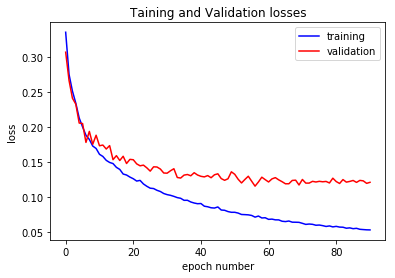

In [0]:
plt.plot(training_losses, 'b-', label='training')
plt.title('Taining and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'r-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

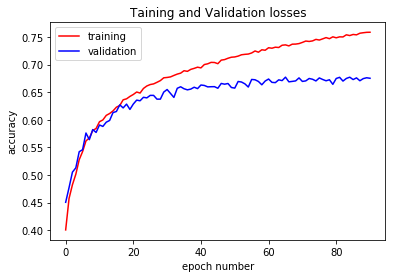

In [0]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Taining and Validation Accuracis')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Training a Sparse GGNN
This time we train the Sparse GGNN implementation. The default parameters provided by the authors' code are as follows:
```python
'batch_size': 100000,
'use_edge_bias': False,
'use_propagation_attention': False,
'use_edge_msg_avg_aggregation': True,
'residual_connections': { 
  # For layer i, specify list of layers whose output is added as an input
  "2": [0],
  "4": [0, 2]
 },
'layer_timesteps': [2, 2, 1, 2, 1],  # number of layers & propagation steps per layer
'graph_rnn_cell': 'GRU',  # GRU, CudnnCompatibleGRUCell, or RNN
'graph_rnn_activation': 'tanh',  # tanh, ReLU
'graph_state_dropout_keep_prob': 1.,
'task_sample_ratios': {},
'edge_weight_dropout_keep_prob': .8
```

In [0]:
try:
  model = SparseGGNNChemModel(args)
  model.train()
except:
  #do nothing

In [0]:
# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
# GET THE LOSS FROM EVERY EPOCH
training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

In [0]:
plt.plot(training_losses, 'b-', label='training')
plt.title('Taining and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'r-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Taining and Validation Accuracis')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Varying Parameters for Dense GGNN
Now we experiment with changing both the graph edge drop-out probability and state drop-out probability. 

In [4]:
args = {
    '--help': False,
    '--config-file': False,
    '--config': '{"num_epochs": 100, \
                "edge_weight_dropout_keep_prob": 0.5, \
                "graph_state_dropout_keep_prob": 0.5}',
    '--log_dir': False,
    '--data_dir': False,
    '--restore': False,
    '--freeze-graph-model': False,
    '--evaluate': False
}


model = DenseGGNNChemModel(args)
model.train()

SyntaxError: ignored

In [0]:
# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
# GET THE LOSS FROM EVERY EPOCH
training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

In [0]:
plt.plot(training_losses, 'b-', label='training')
plt.title('Taining and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'r-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Taining and Validation Accuracis')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Varying Parameters for Dense GGNN
Now we train the Dense GGNN with a RelU activation layer instead of a TanH activation layer

In [0]:
args = {
    '--help': False,
    '--config-file': False,
    '--config': '{"num_epochs": 100, \
                "graph_rnn_activation": "relu"}',
    '--log_dir': False,
    '--data_dir': False,
    '--restore': False,
    '--freeze-graph-model': False,
    '--evaluate': False
}


model = DenseGGNNChemModel(args)
model.train()

In [0]:
# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
# GET THE LOSS FROM EVERY EPOCH
training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

In [0]:
plt.plot(training_losses, 'b-', label='training')
plt.title('Taining and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'r-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Taining and Validation Accuracis')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

We now maintain the default TanH activation layer and attempt to change the dropout probabilities. 

In [0]:
args = {
    '--help': False,
    '--config-file': False,
    '--config': '{"num_epochs": 100, \
                "graph_state_dropout_keep_prob": 0.5, \
                "edge_weight_dropout_keep_prob": 0.5}',
    '--log_dir': False,
    '--data_dir': False,
    '--restore': False,
    '--freeze-graph-model': False,
    '--evaluate': False
}


model = DenseGGNNChemModel(args)
model.train()

In [0]:
# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
# GET THE LOSS FROM EVERY EPOCH
training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

In [0]:
plt.plot(training_losses, 'b-', label='training')
plt.title('Taining and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'r-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Taining and Validation Accuracis')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()